<a href="https://colab.research.google.com/github/alorozco53/COMP596-Assignment1/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

**COMP 596: Network Science**

Prof Reihaneh Rabbany

Author: Albert M Orozco Camacho

## Data Downloading


I used Google Colab for this assignment, thus, the following code downloads the data from Barabasi's site and saves it in my Google Drive.

In [0]:
import codecs
import os

from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget http://networksciencebook.com/translations/en/resources/networks.zip -O /content/drive/My\ Drive/courses/network-science/assignments/data/networks.zip
!cd /content/drive/My\ Drive/courses/network-science/assignments/data && unzip networks.zip && rm -rf networks.zip

Archive:  networks.zip
  inflating: actor.edgelist.txt      
  inflating: citation.edgelist.txt   
  inflating: collaboration.edgelist.txt  
  inflating: email.edgelist.txt      
  inflating: internet.edgelist.txt   
  inflating: metabolic.edgelist.txt  
  inflating: phonecalls.edgelist.txt  
  inflating: powergrid.edgelist.txt  
  inflating: protein.edgelist.txt    
  inflating: www.edgelist.txt        


## Data Loading

Now we load the data to the current notebook. We store our data in `NumPy` `array`s.

In [0]:
import os
import numpy as np

In [3]:
# Path organization
data_global_path = '/content/drive/My Drive/courses/network-science/assignments/data'

dataset_names_vs_paths = {filename.split('.')[0]: 
                          os.path.join(data_global_path, filename)
                          for filename in os.listdir(data_global_path)}
dataset_names_vs_paths

{'actor': '/content/drive/My Drive/courses/network-science/assignments/data/actor.edgelist.txt',
 'citation': '/content/drive/My Drive/courses/network-science/assignments/data/citation.edgelist.txt',
 'collaboration': '/content/drive/My Drive/courses/network-science/assignments/data/collaboration.edgelist.txt',
 'email': '/content/drive/My Drive/courses/network-science/assignments/data/email.edgelist.txt',
 'internet': '/content/drive/My Drive/courses/network-science/assignments/data/internet.edgelist.txt',
 'metabolic': '/content/drive/My Drive/courses/network-science/assignments/data/metabolic.edgelist.txt',
 'phonecalls': '/content/drive/My Drive/courses/network-science/assignments/data/phonecalls.edgelist.txt',
 'powergrid': '/content/drive/My Drive/courses/network-science/assignments/data/powergrid.edgelist.txt',
 'protein': '/content/drive/My Drive/courses/network-science/assignments/data/protein.edgelist.txt',
 'www': '/content/drive/My Drive/courses/network-science/assignments/

In [0]:
# Actual loading in arrays
loader = lambda path: np.loadtxt(path, delimiter='\t', dtype=np.int)

In [0]:
dataset = {name: loader(path) for name, path in dataset_names_vs_paths.items()}

In [0]:
for name, data in dataset.items():
    print('{} has shape {}'.format(name, data.shape))

## General Auxiliar Functions

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csc_matrix, lil_matrix

- Adjacency matrix computation (we asume that the given graph is simple)

In [0]:
def adjacency_matrix(graph):
    # Set dimensions and instantiate the matrix
    dim = np.unique(graph).shape[0]
    adj_m = lil_matrix((dim, dim), dtype=np.int)

    # Find all adjacencies and fill accordingly
    for node in graph:
        if node[0] != node[1]:
            adj_m[node[0], node[1]] = 1
            adj_m[node[1], node[0]] = 1
    
    return csc_matrix(adj_m)

## Assignment's Content

### Question 1

#### Algorithms

We firstly define the algorithms to compute the requested statistics and then use them with the data

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix

In [0]:
graph_data = loader(dataset_names_vs_paths['internet'])
adj = adjacency_matrix(graph_data)
save_path = '/content/drive/My Drive/courses/network-science/assignments/results/internet'
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [0]:
save_path = '/content/drive/My Drive/courses/network-science/assignments/results/ba-model-1000'
if not os.path.exists(save_path):
    os.mkdir(save_path)

**a)** _Degree Distribution_

$$p_k = \frac{N_k}{N}$$

**Complexity Analysis**

Let $n$ be the total number of vertices of a network $G$, and $m$ the the total number of edges. For each of the following steps, we note the running time in terms of $n$ and $m$.

In [0]:
#@title Pipeline code to compute the degree distribution
#@markdown and plot it
def degree_distr_pipeline(adj_matrix):
    #@markdown 1. Compute the degree counts (`N_k`) as well as log-counts
    #@markdown - This operation takes O(n^2) steps, since we traverse the adjacency matrix and sum each row
    counter = lil_matrix((adj_matrix.shape[0], 1),
                         dtype=np.int)
    for row in range(adj_matrix.shape[0]):
        degree = adj_matrix[row].sum()
        counter[degree, 0] += 1
    counts = csr_matrix(counter)
    
    #@markdown 2. Keep track of each degree and its log form
    k = np.array(range(counts.shape[0]))
    log_k = np.log10(k)

    #@markdown 3. Compute probabilities and log-probabilities
    #@markdown - This operation takes O(n^2) steps, since we compute O(n^2) logs
    p_k = (counts / counts.sum()).toarray()
    log_p_k = np.log10(p_k)

    #@markdown 4. Plot previous distributions
    plt.title('p_k -- Linear Scale')
    plt.scatter(k, p_k)
    plt.savefig(os.path.join(save_path, 'degree_distribution0.jpg'))
    plt.figure()
    plt.title('p_k -- Log Scale')
    plt.scatter(log_k[1:], log_p_k[1:])
    plt.savefig(os.path.join(save_path, 'degree_distribution1.jpg'))
    plt.figure()

    #@markdown 5. Compute the cumulative distribution
    #@markdown - we firstly organize our data and sort it in ascending order, according to k
    distr = np.hstack((np.expand_dims(k, axis=1),
                       np.expand_dims(log_k, axis=1),
                       p_k, log_p_k))
    distr = distr[distr[:, 0].argsort()]
    #@markdown - compute and remove `np.inf` entries
    p_k_cum = distr[:, 2].cumsum()
    log_p_k_cum = np.log10(p_k_cum)

    #@markdown 6. Log-binning
    #@markdown - Here we use a list of the probabilities-degrees per node (at most O(n) space) and use it
    #@markdown - to generate the histogram. Therefore, this takes O(n) time
    log_p_k = log_p_k[~np.isinf(log_p_k)]
    bins = np.logspace(np.log10(k[1:].min()), np.log10(k[1:].max()))
    histy, _ = np.histogram(k[1:], weights=p_k[1:].squeeze(), bins=bins)
    histx, _ = np.histogram(k[1:], weights=k[1:], bins=bins)
    histy = histy / np.histogram(k[1:], bins=bins)[0]
    histx = histx / np.histogram(k[1:], bins=bins)[0]
    histx = np.log10(histx[~np.isnan(histx)])
    histy = np.log10(histy[~np.isnan(histy)])
    plt.title('Log-binning')
    plt.scatter(histx, histy)
    plt.savefig(os.path.join(save_path, 'degree_distribution2.jpg'))
    plt.figure()

    #@markdown 8. Straight line fitting using `np.polyfit`
    hists = np.vstack((histx, histy)).T
    hists = hists[~np.isinf(hists).any(axis=1)]
    log_line = np.polyfit(hists[:, 0], hists[:, 1], deg=1)
    y = log_line[0]*hists[:, 0] + log_line[1]
    plt.title('Line fitting Log-binning')
    plt.plot(hists[:, 0], y, c='r')
    plt.scatter(histx, histy)
    plt.savefig(os.path.join(save_path, 'degree_distribution3.jpg'))
    plt.figure()

    #@markdown 7. Plot cumulative distributions
    plt.title('Cumulative p_k')
    plt.scatter(k, p_k_cum)
    plt.savefig(os.path.join(save_path, 'degree_distributio4.jpg'))
    plt.figure()
    plt.title('Cumulative log_p_k')
    plt.scatter(log_k, log_p_k_cum)
    plt.savefig(os.path.join(save_path, 'degree_distribution5.jpg'))
    plt.figure()

    #@markdown 10. Finally report the slope
    print('slope: {}'.format(log_line[0]))

According to the documentation in the proevious cell, all the operations needed to compute the degree distributions have a bound of $O(n^2)$ running time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


slope: -2.0944099677874553


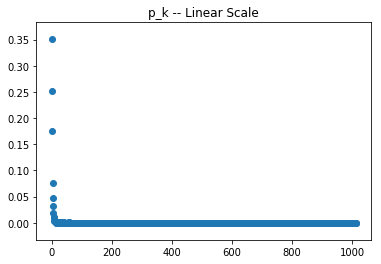

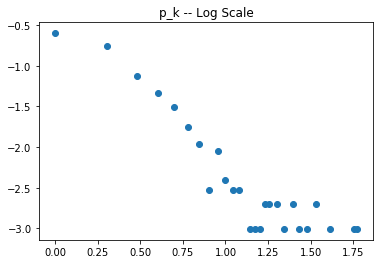

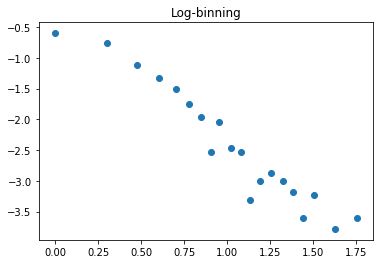

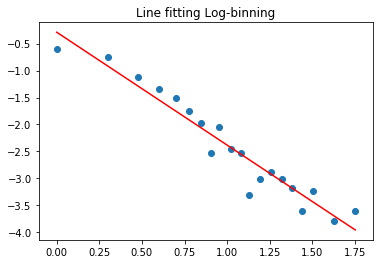

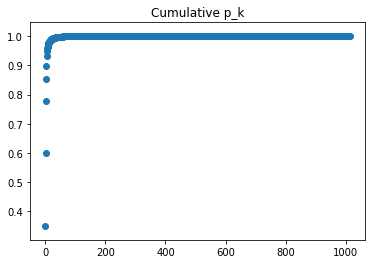

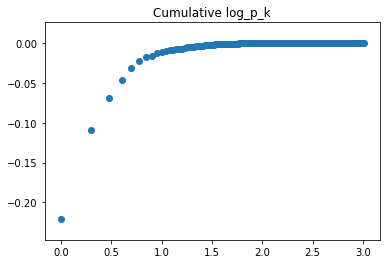

<Figure size 432x288 with 0 Axes>

In [58]:
degree_distr_pipeline(network)

**b)** _Clustering Coefficient Distribution_

**Complexity Analysis**

To compute the CCD, we must compute the second and third power of an adjacency matrix. In general, a matrix product takes a cubic amount of time, so regardless of `NumPy`'s backend optimizations, it may take $(O(n^2))^3 = O(n^6)$ time.

On the other hand, it seems that `NumPy` handles this with parallel algorithms, which implies an efficient multiplication.

In [0]:
def ccd(adjacency_matrix):
    # A^2 and A^3
    try:
        a_squared = (adjacency_matrix ** 2).toarray()
        a_cube = (adjacency_matrix ** 3).toarray()
    except AttributeError:
        a_squared = adjacency_matrix.dot(adjacency_matrix)
        a_cube = a_squared.dot(adjacency_matrix)


    # Global clustering coefficient
    gcc = np.trace(a_cube) / (a_squared.sum() - np.trace(a_squared))

    # Compute clustering coefficient distribution
    degrees = np.asarray(adjacency_matrix.sum(axis=0)).squeeze()
    diagonal = a_cube.diagonal().squeeze()
    cc = diagonal / (degrees * (degrees - 1))
    cc = cc[~np.isnan(cc)]

    # Compute cumulative distribution of ccd
    cc_cum = cc.cumsum()

    # Plot the distribution
    nodes = np.array(range(cc.shape[0]))
    plt.plot(nodes, cc_cum)
    plt.savefig(os.path.join(save_path, 'ccd.jpg'))

    return gcc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


0.016693388663585777

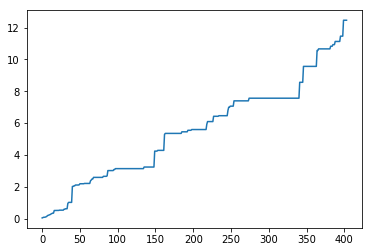

In [60]:
ccd(network)

**c)** Shortest paths distribution

**Complexity Analysis**

In this case, `sciPy` decides which algorithm to use (Johnson's, Bellman-Ford, Floyd-Warshall, Dijkstra), according to the graph's characteristics. Complexities in worst-case scenarios may vary from $O((n + m) \log n)$ to $O(m^3)$. Thus, in an average scenario, the outcome is a quadratic performance.

In [0]:
from scipy.sparse.csgraph import shortest_path

In [0]:
def shortest_path_distr(adjacency_matrix):
    # Compute distances
    distances = shortest_path(adjacency_matrix, unweighted=True)

    # Count their frequencies
    distances, counts = np.unique(distances, return_counts=True)
    
    # Normalize counts
    prob_sp = counts / adjacency_matrix.shape[0]

    # Plot the distribution
    plt.plot(distances, prob_sp)
    plt.savefig(os.path.join(save_path, 'shortest_path_distr.jpg'))

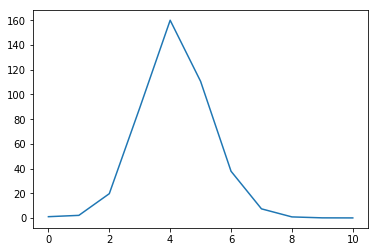

In [63]:
shortest_path_distr(network)

**d)** Number of connected components (portion of nodes in GCC)

**Complexity Analysis**

This algorithm requires traversing the whole graph via BFS or DFS. This will visit each vertex and edge at most once. Thus, the complexity is $O(n + m)$.

In [0]:
from collections import Counter
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

In [0]:
def connected_compontents_pipeline(adjacency_matrix):
    # Get number of connceted components and their node labels
    n_components, labels = connected_components(csgraph=adjacency_matrix,
                                                directed=False, 
                                                return_labels=True)
    
    # Get the GCC and count their nodes
    components_number = Counter(labels)
    components_number.most_common(n=3)

    # compute proportion of nodes in GCC
    prop_gcc = components_number[0] / sum(components_number.values())

    return n_components, prop_gcc

In [66]:
n_comp, prop_gcc = connected_compontents_pipeline(network)
print('number of connected components: {}'.format(n_comp))
print('proportion of GCC: {:.2%}'.format(prop_gcc))

number of connected components: 356
proportion of GCC: 64.99%


**e)** _Eigenvalue distribution_

**Complexity Analysis**

This one requires doing eigenvalue decomposition, which takes $O(n^2)$ time.

In [0]:
from scipy.sparse.linalg import eigs
from scipy.sparse.csgraph import laplacian

In [0]:
def eigenvalue_distr(adjacency_matrix):
    # Compute the laplacian matrix
    lapl = laplacian(adjacency_matrix)

    # Compute eigenvalues
    eigenvalues, _ = eigs(lapl.astype(np.float), k=100)
    eigenvalues = np.real(eigenvalues)
    eigenvalues.sort()

    plt.plot(np.array(range(eigenvalues.shape[0])), eigenvalues)
    plt.savefig(os.path.join(save_path, 'eigenvalue_distr.jpg'))

    return eigenvalues[:2]

array([5.13273039, 5.1867426 ])

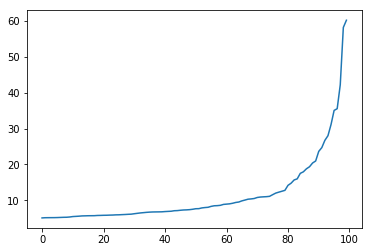

In [69]:
eigenvalue_distr(network)

**f)** _Degree Correlations_

**Complexity Analysis**

This one takes $O(n^2)$ time, since that's what we need to compute de correlation matrix.

In [0]:
def degree_correl(adjacency_matrix):
    # Get maximum degree
    max_degree = np.max(adjacency_matrix.sum(axis=0))

    # Fill out degree correlation matrix
    deg_correl = np.zeros((max_degree+1))
    for i in range(adjacency_matrix.shape[0]):
        for j in range(i, adjacency_matrix.shape[1]):
            d_i = adjacency_matrix[i].sum()
            d_j = adjacency_matrix[j].sum()
            deg_correl[d_i] += 1
            deg_correl[d_j] += 1

    # Normalize the matrix
    deg_correl = deg_correl / deg_correl.sum()

    # Plot the matrix
    plt.hist2d(np.array(range(max_degree+1)),
               np.array(range(max_degree+1)),
               weights=deg_correl)
    plt.savefig(os.path.join(save_path, 'degree_correl.jpg'))

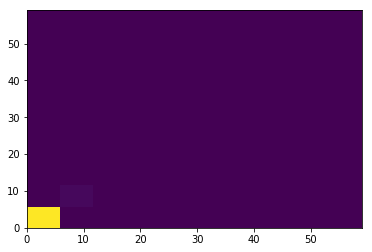

In [71]:
degree_correl(network)

**g)** _Degree clustering coefficient relation_

**Complexity Analysis**

This one requires $O(n^6)$ time, similar to the CCD algorithm, but again, `numPy` improves the performance significantly.

In [0]:
def degree_cc_rel(adjacency_matrix):
    # A^2 and A^3
    try:
        a_squared = (adjacency_matrix ** 2).toarray()
        a_cube = (adjacency_matrix ** 3).toarray()
    except AttributeError:
        a_squared = adjacency_matrix.dot(adjacency_matrix)
        a_cube = a_squared.dot(adjacency_matrix)

    # Compute clustering coefficient distribution
    degrees = np.asarray(adjacency_matrix.sum(axis=0)).squeeze()
    cc = a_cube.diagonal().squeeze() / (degrees * (degrees - 1))

    # Plot degree cc relation
    plt.scatter(cc, degrees)
    plt.savefig(os.path.join(save_path, 'degree_cc_rel.jpg'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


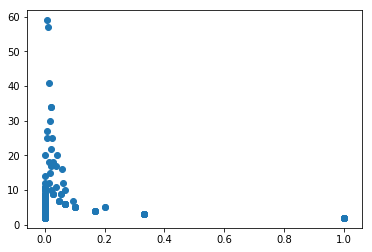

In [73]:
degree_cc_rel(network)

### Question 3 

_Barabasi-Albert Model_

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [0]:
#@title Node instantiation

#@markdown initial number of nodes
m_0 = 7 #@param {type:"slider", min:1, max:100, step:1}



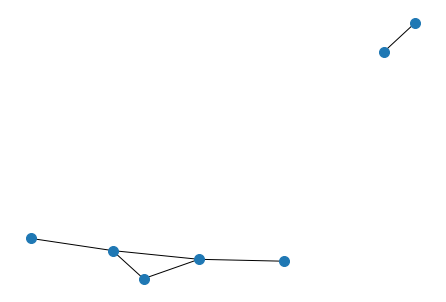

In [105]:
# Instantiate network
p_initial = 0.16 #@param {type:"slider", min:0, max:1, step:0.01}
network = np.zeros((m_0, m_0), dtype=np.int)
for i in range(m_0):
    for j in range(i, m_0):
        if i != j:
            network[i, j] = 1 if np.random.rand() <= p_initial else 0
            network[j, i] = network[i, j]

# Draw network
rows, cols = np.where(network == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
nx.draw(gr, node_size=100)
#plt.show()
plt.savefig(os.path.join(save_path, 'ba-animation',
                         'network-{}.png'.format(0)),
            format='PNG')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


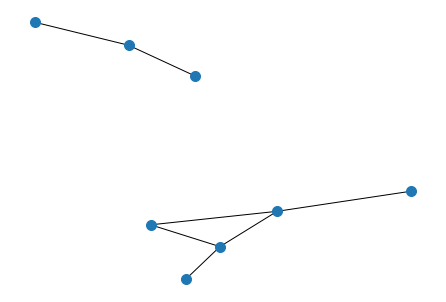

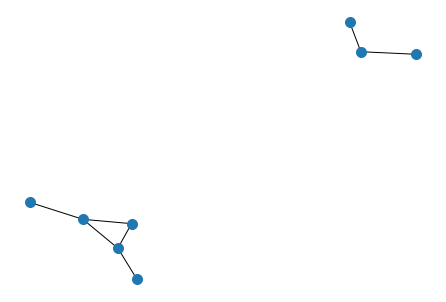

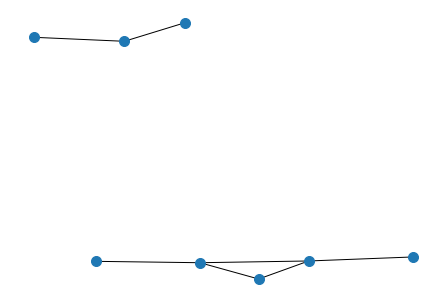

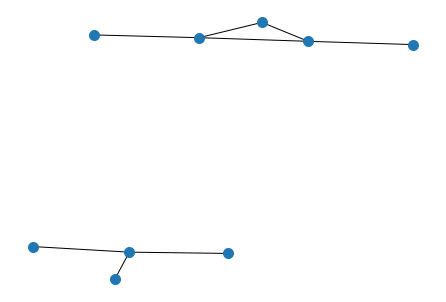

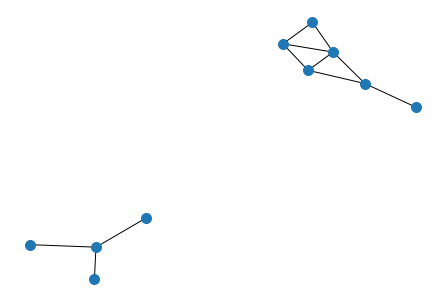

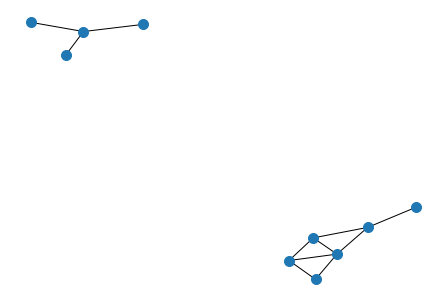

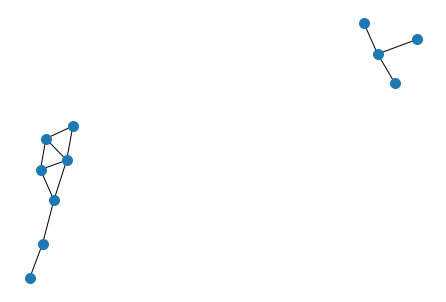

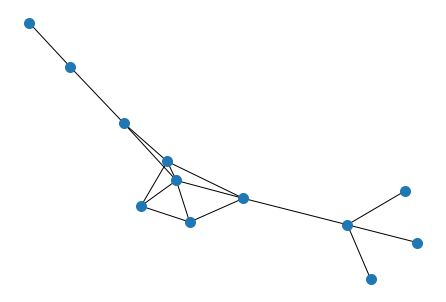

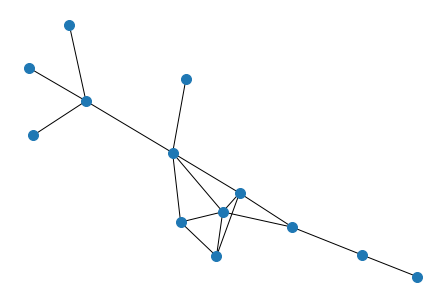

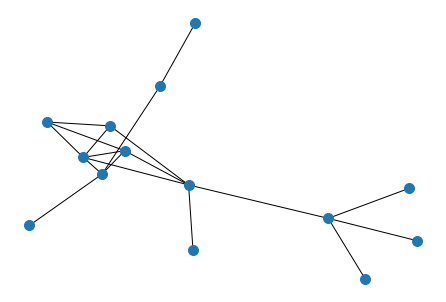

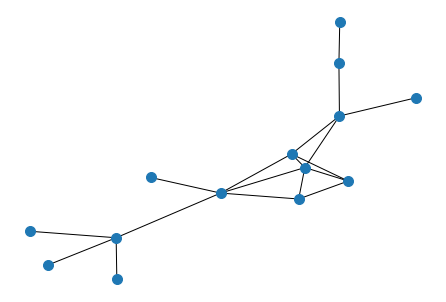

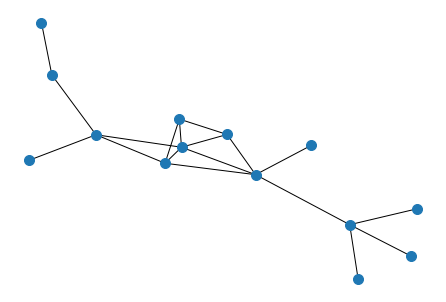

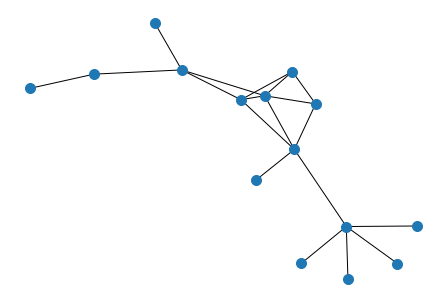

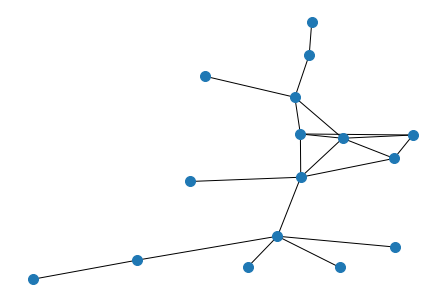

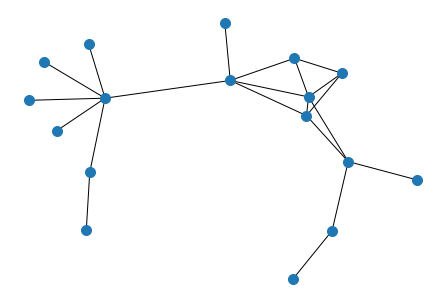

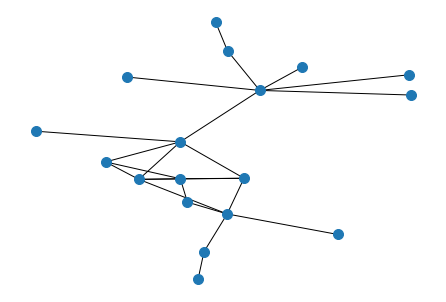

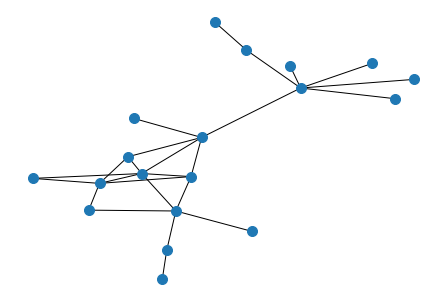

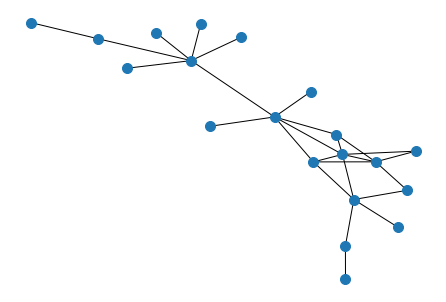

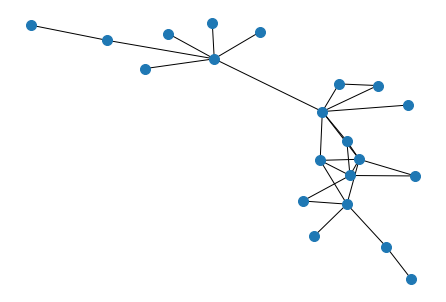

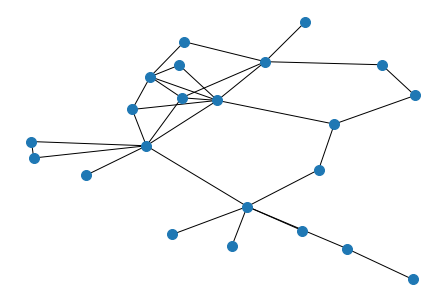

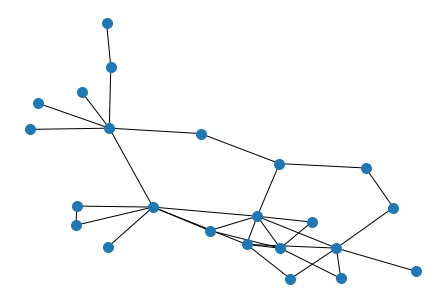

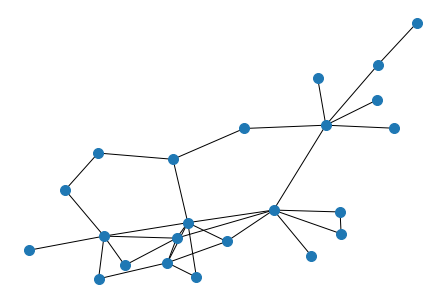

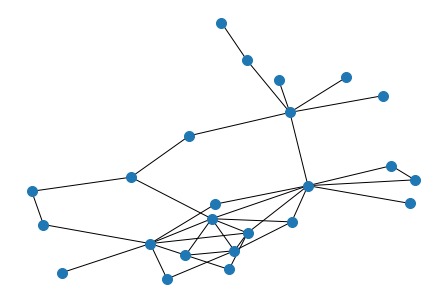

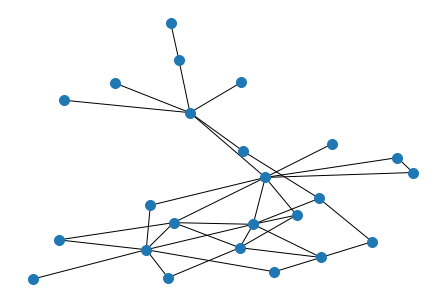

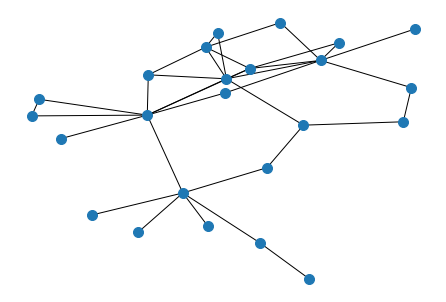

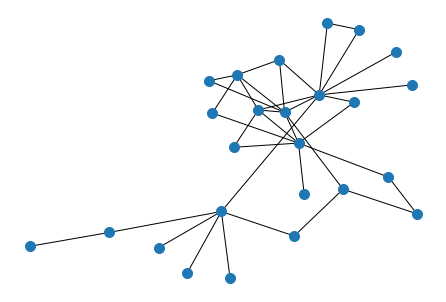

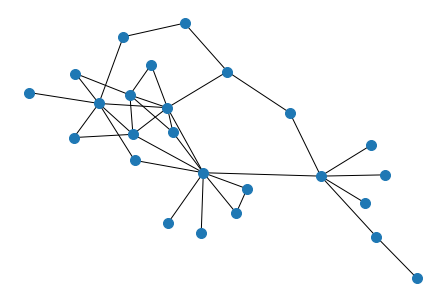

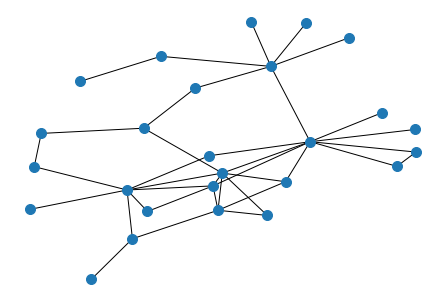

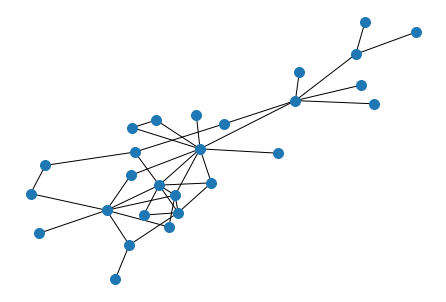

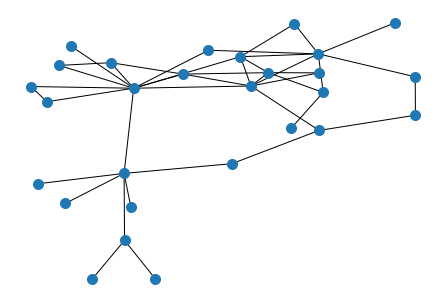

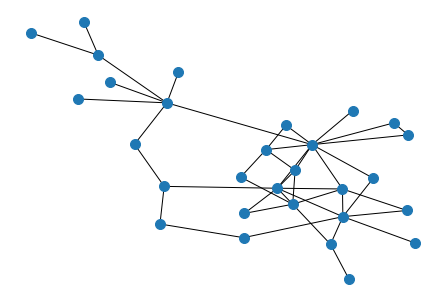

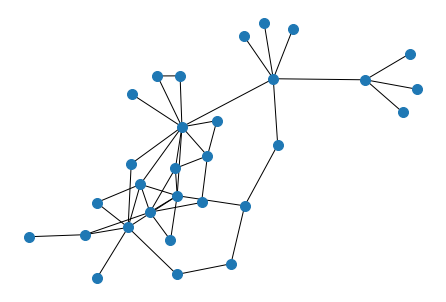

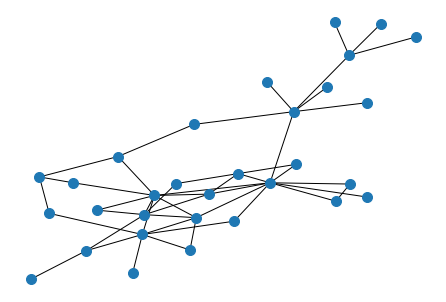

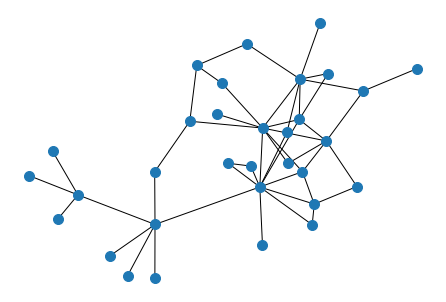

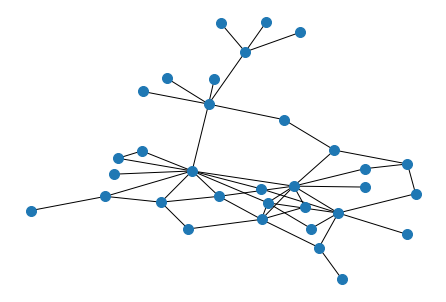

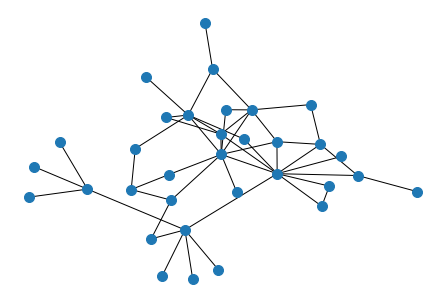

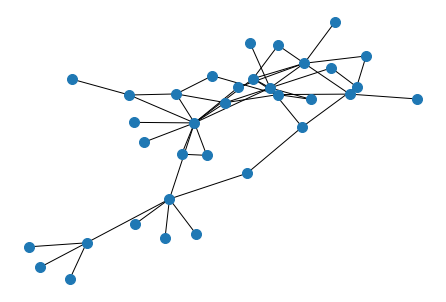

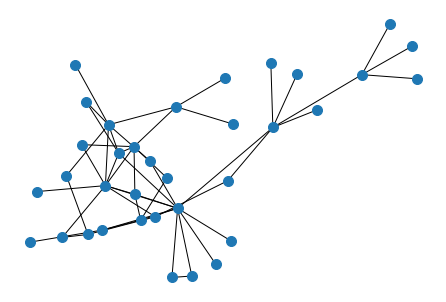

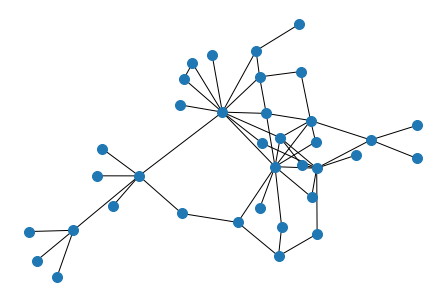

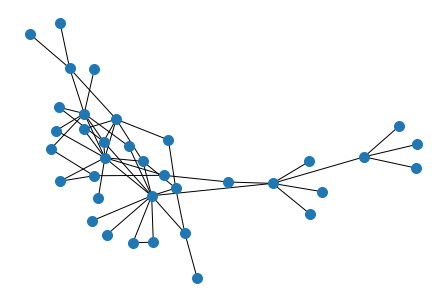

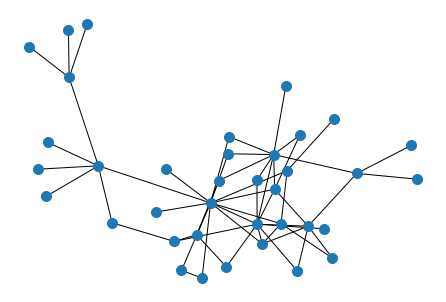

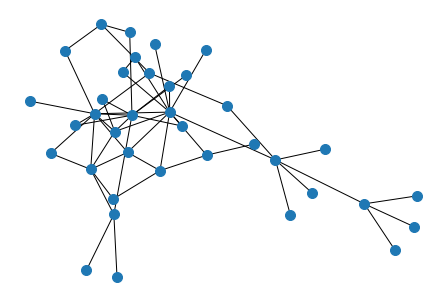

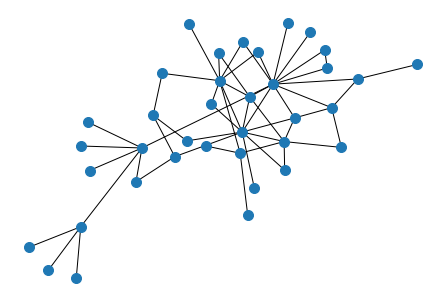

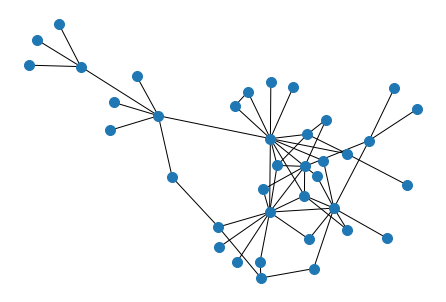

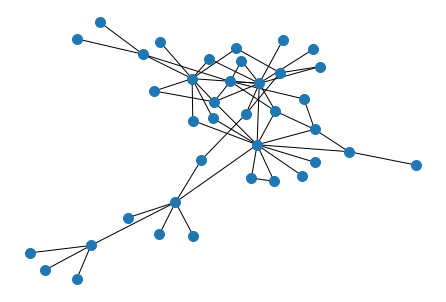

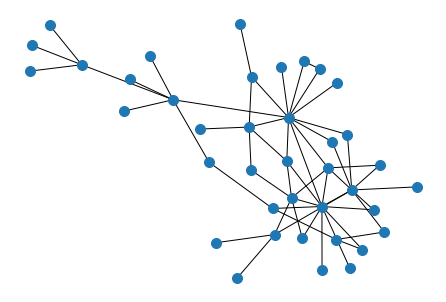

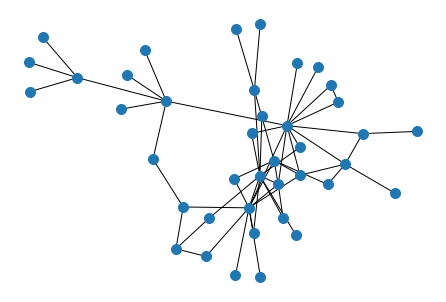

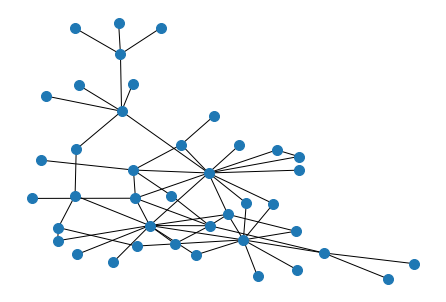

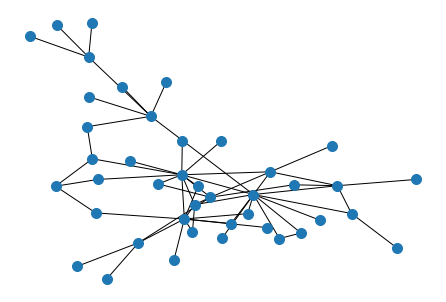

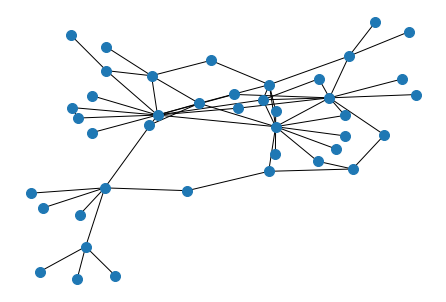

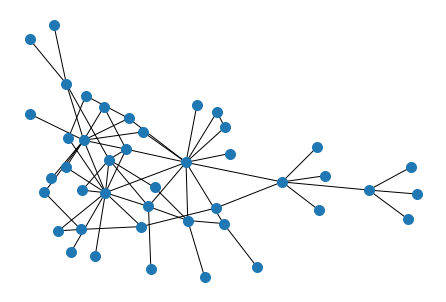

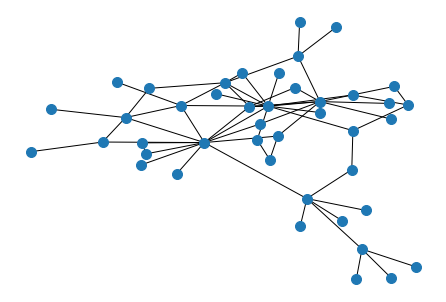

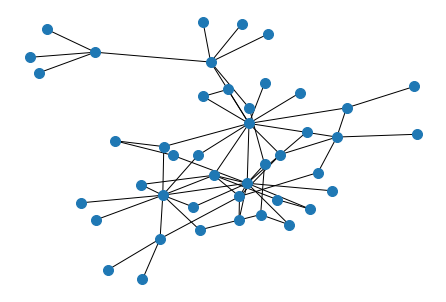

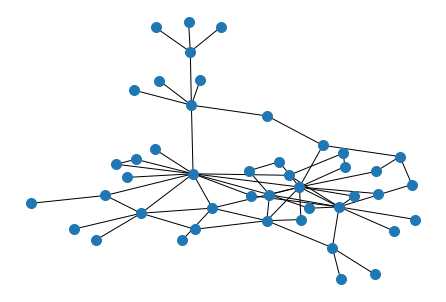

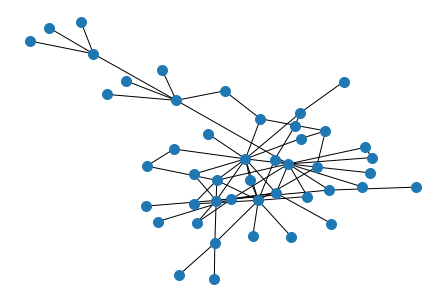

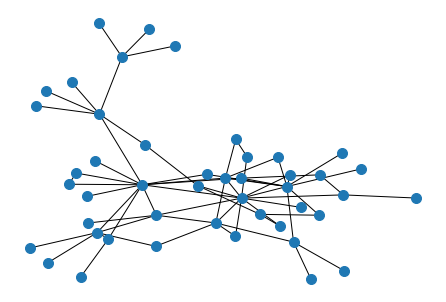

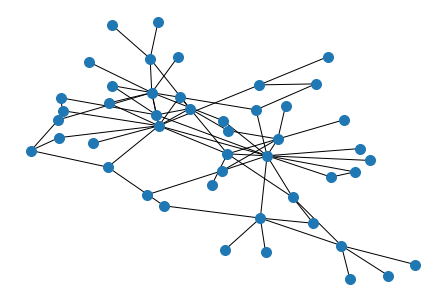

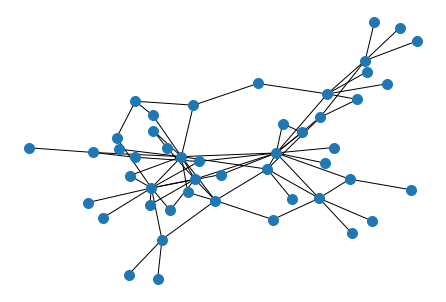

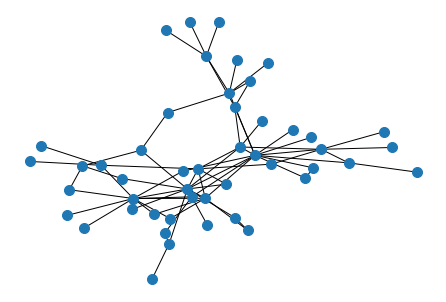

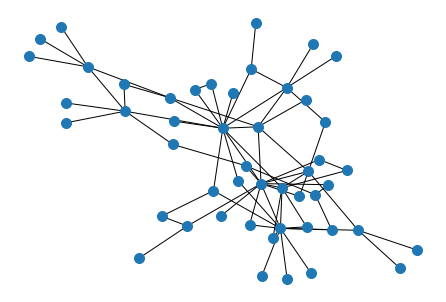

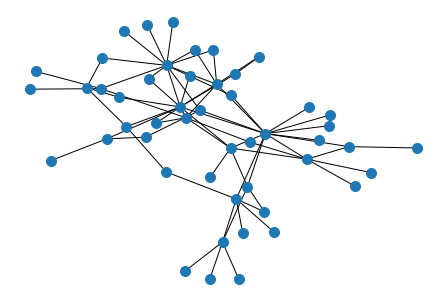

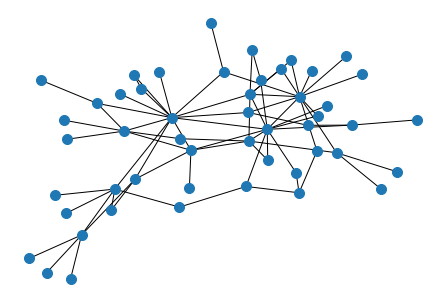

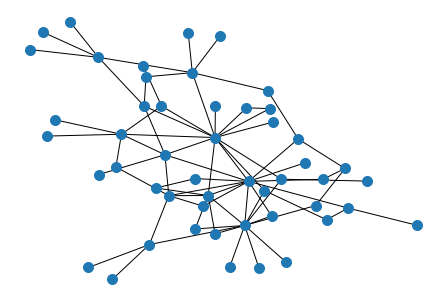

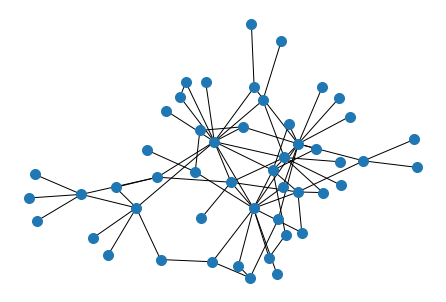

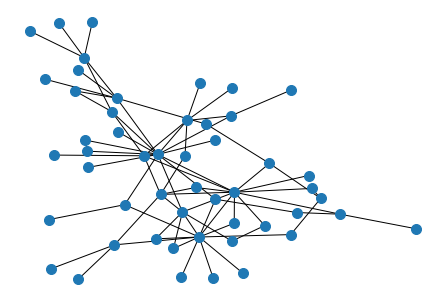

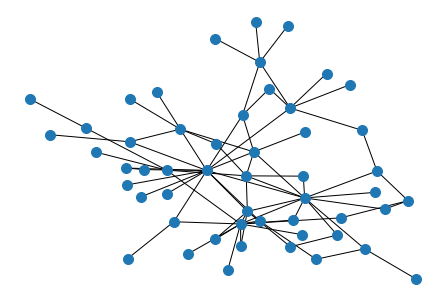

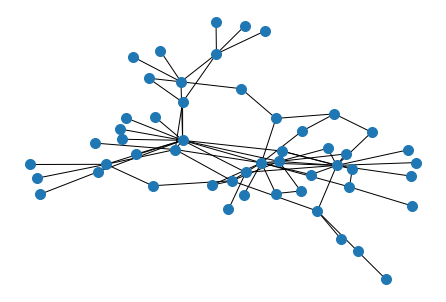

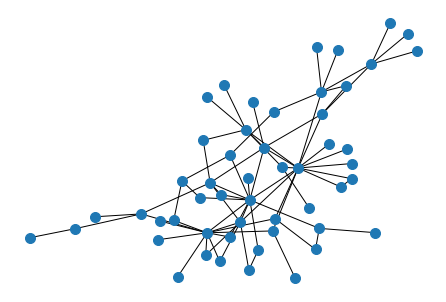

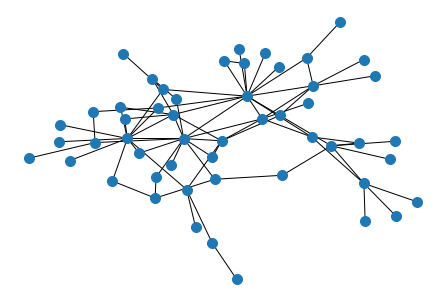

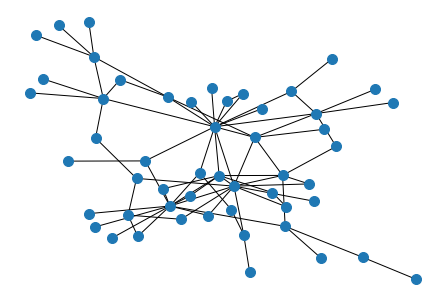

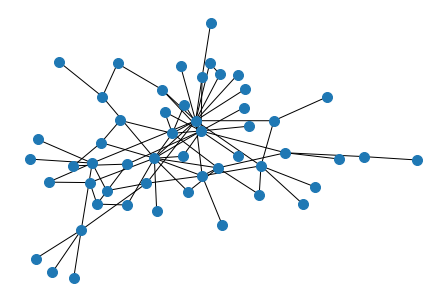

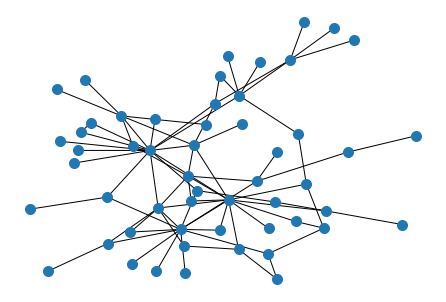

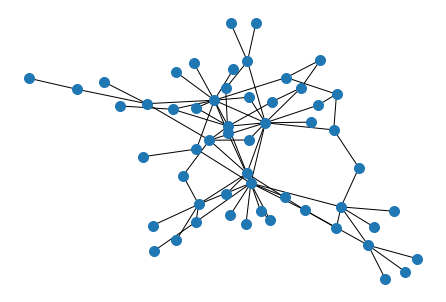

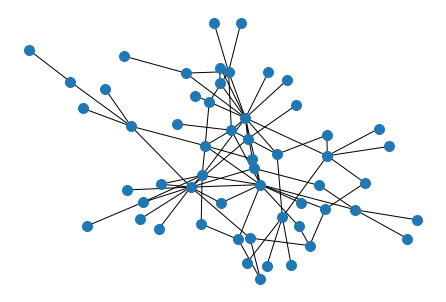

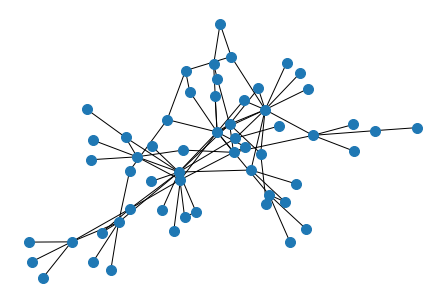

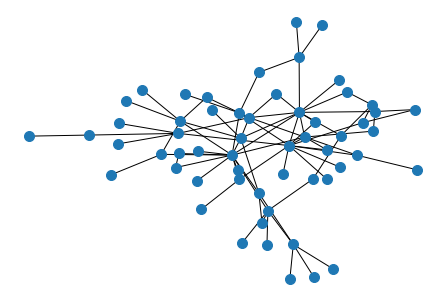

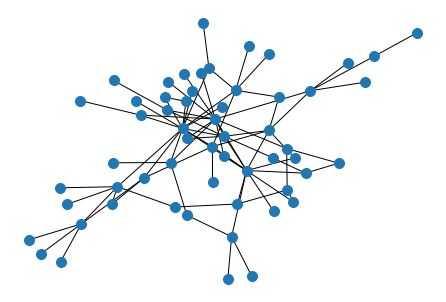

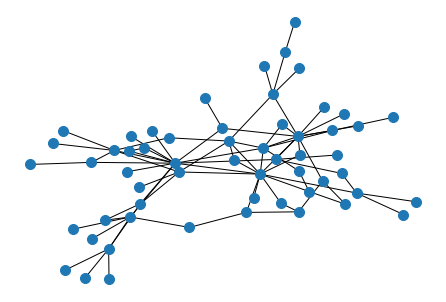

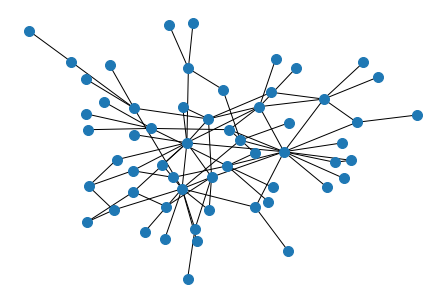

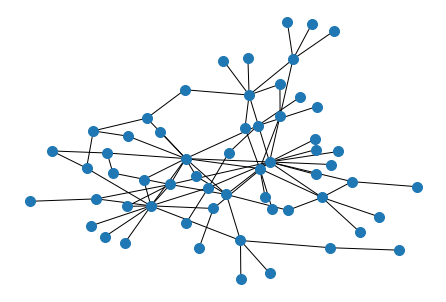

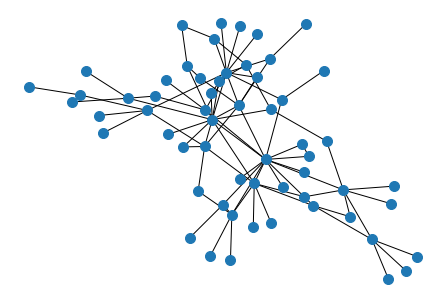

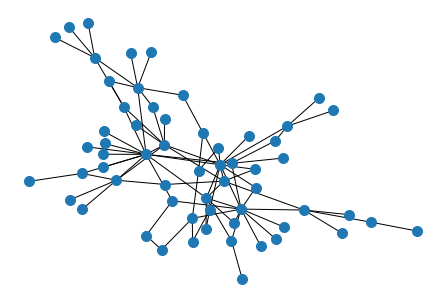

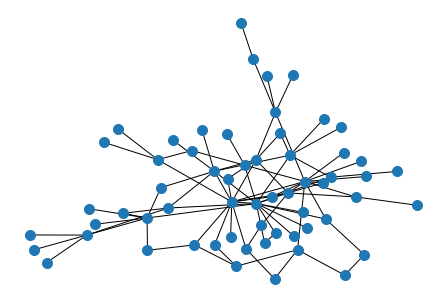

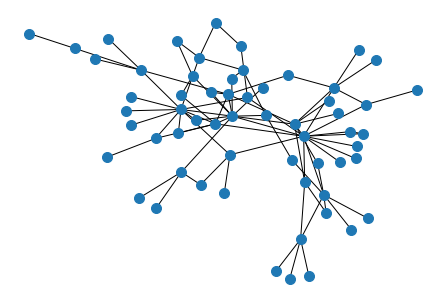

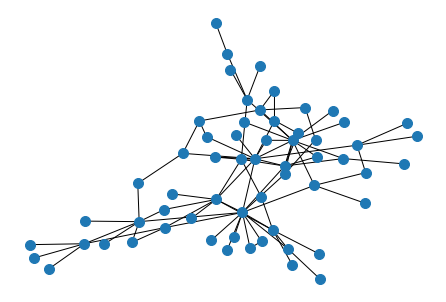

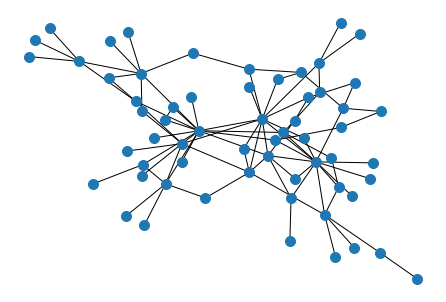

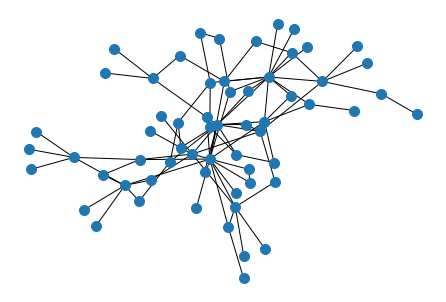

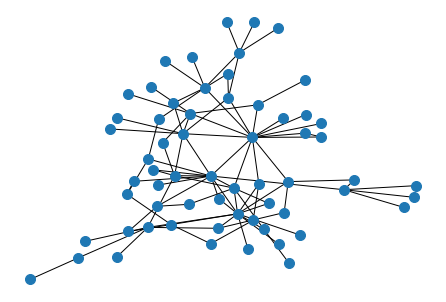

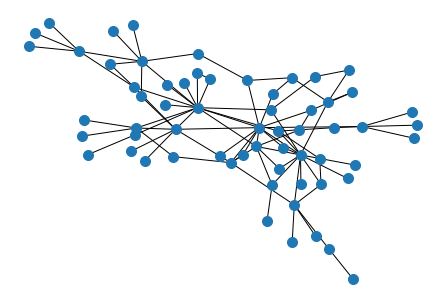

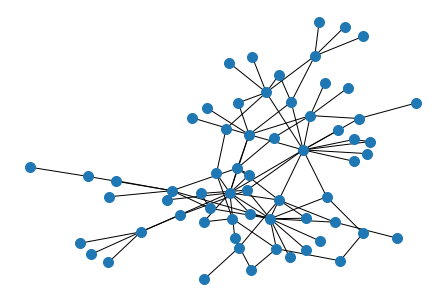

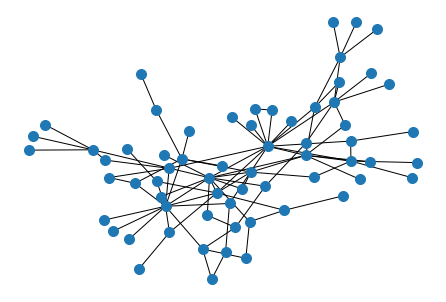

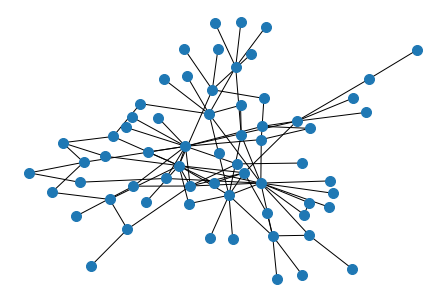

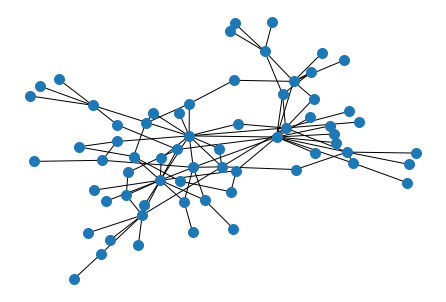

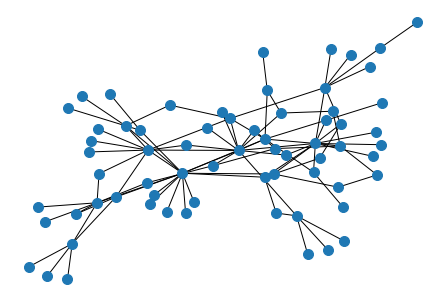

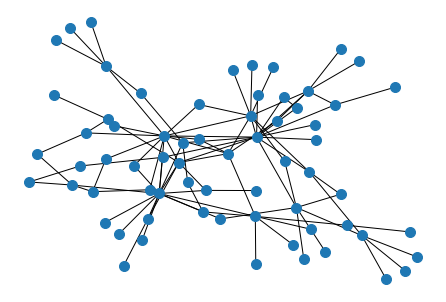

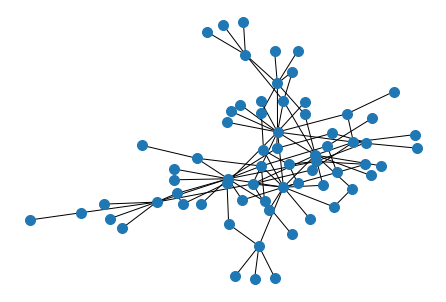

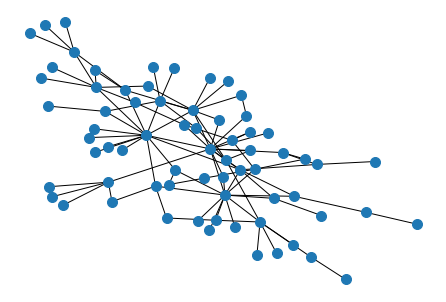

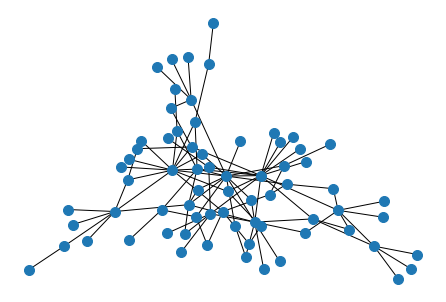

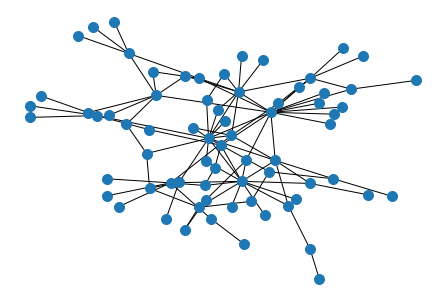

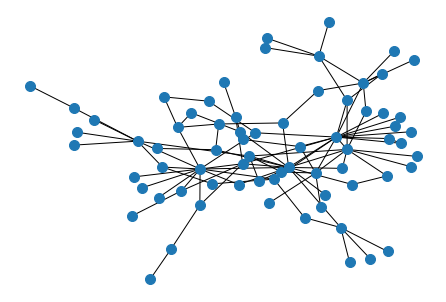

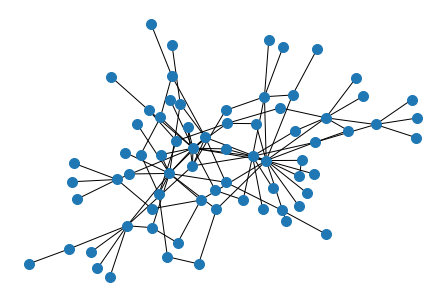

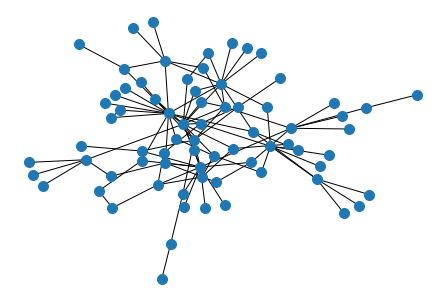

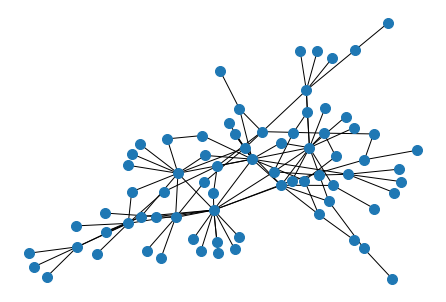

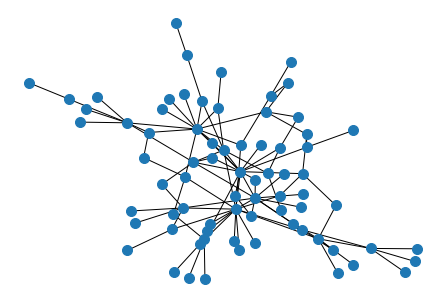

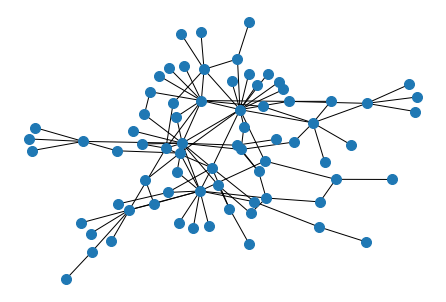

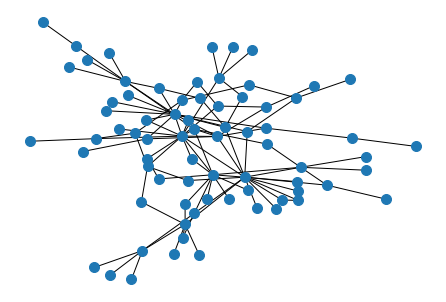

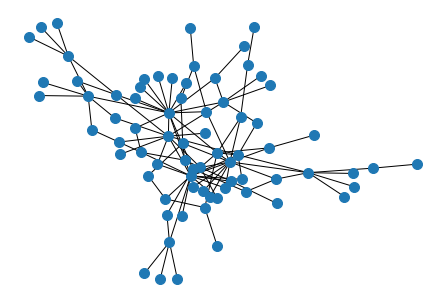

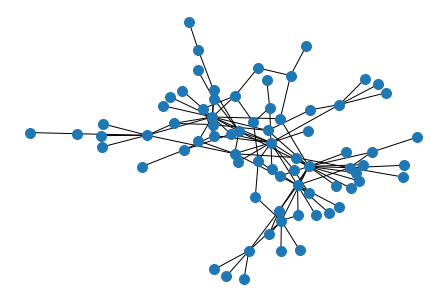

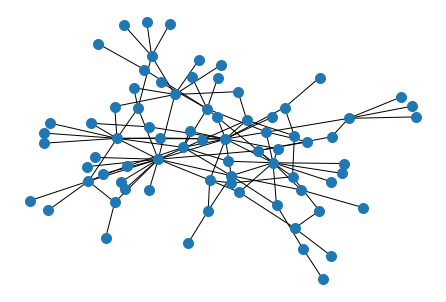

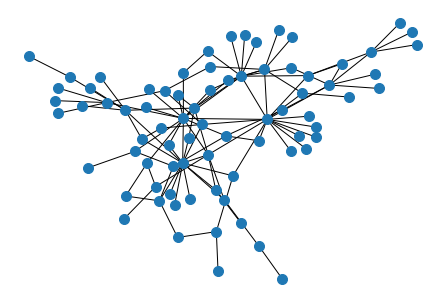

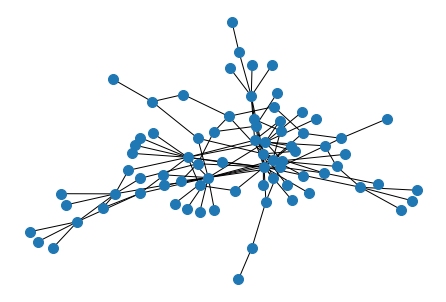

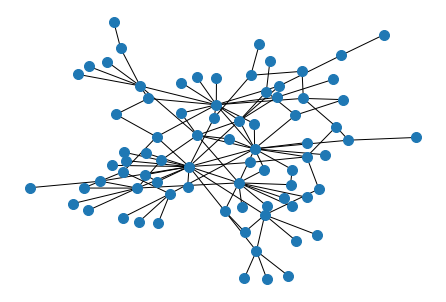

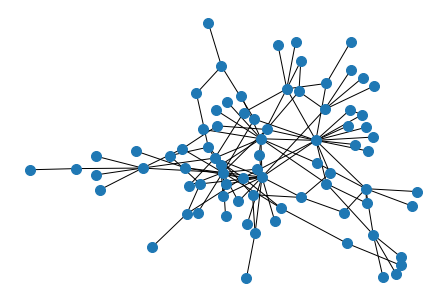

<Figure size 432x288 with 0 Axes>

In [106]:
# New node arrival loop
steps = 113 #@param {type:"slider", min:1, max:1000, step:1}
draw = True #@param {type:'boolean'}
if not os.path.exists(os.path.join(save_path, 'ba-animation')):
    os.mkdir(os.path.join(save_path, 'ba-animation'))

for step in range(1, steps+1):
    # instantiate new columns and rows
    network = np.vstack((network, np.zeros((1, network.shape[1]), dtype=np.int)))
    network = np.hstack((network, np.zeros((network.shape[0], 1), dtype=np.int)))

    # compute probability of preferential attachment
    prob_conn = network.sum(axis=0) / network.sum()

    # compute m <= m_0 new links
    network[-1, :][np.random.random(network[-1, :].shape) <= prob_conn] = 1
    network[:, -1] = network[-1, :].T

    # Draw network
    if draw:
        rows, cols = np.where(network == 1)
        edges = zip(rows.tolist(), cols.tolist())
        gr = nx.Graph()
        gr.add_edges_from(edges)
        dr = nx.draw(gr, node_size=100)
        #plt.show(block=False)
        plt.savefig(os.path.join(save_path, 'ba-animation',
                                 'network-{}.png'.format(step)),
                    format='PNG')
        plt.figure()

In [0]:
import matplotlib.animation as animation


In [82]:
fig = plt.figure()
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.show()

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1536, in _init_draw
    artist.set_visible(False)
AttributeError: 'NoneType' object has no attribute 'set_visible'


<Figure size 432x288 with 0 Axes>

### BONUS

_Prove that the number of the Laplacian's eigenvalues zero correspond to the number of connected components._

Let $L$ be the laplacian matrix for graph $G = (V, E)$.

Firstly, we observe that the sum of each row of $L$ always gives 0, by its definition. This implies that the vector $(1, 1, \ldots, 1)$ (where its length depends on the number of nodes $|V|$) is an _eigenvector_ of $L$ with _eigenvalue_ 0.

Now let's suppose, without loss of generality that $G$ has $c$ components, whose number of vertices are $n_1, n_2, \ldots, n_c$. Consider reordering $L$, by shifting rows, such that every two adjacent rows correspond to vertices in the same component.

By the latter operation, we can "bound" each component $n_i$ and visualize it as a box. In fact, $L$ now has the form of a box diagonal matrix, having exactly $c$ boxes.

For each block $n_i$, observe that it, itself, is the laplacian for the $i$-th component of $G$. This means that each one has _eigenvector_ $(1, 1, \ldots, 1)$ (for $n_i$ elements) with eigenvalue 0.

By construction, there are $c$ different linearly independent _eigenvectors_ with _eigenvalue_ 0 (vectors have 1 in $n_i$ positions and 0 in $k \neq i$.

Therefore $G$ has $c$ eigenvalues 0.